In [ ]:
import wandb
import torch
from train import get_model, conditional_decode_mog, draw_sample
import matplotlib.pyplot as plt

device = 'cpu'

run = wandb.init()
artifact = run.use_artifact('pmin/nma-neuroai/model_checkpoint_1999.pth:v0', type='dataset')
artifact_dir = artifact.download()

In [ ]:
model = get_model(146)
model.load_state_dict(
    torch.load(artifact_dir + '/model_checkpoint_1999.pth', map_location=torch.device(device)))
model = model.to(device)

## Noisy samples

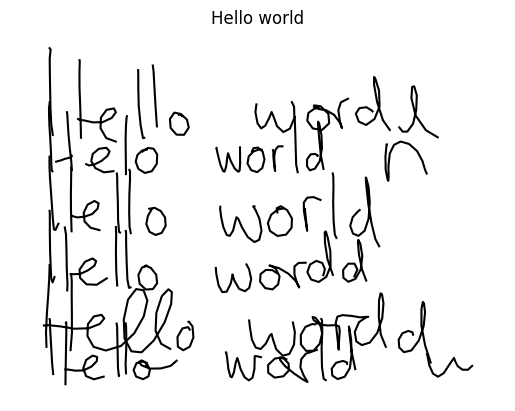

In [6]:
# Create a test string
text_tokens = torch.tensor([ord(x) for x in "Hello world"])
hello_world = torch.zeros(1, 64).to(device=torch.device(device), dtype=torch.long)
hello_world[:, : len(text_tokens)] = text_tokens

with torch.no_grad():
    decoded = conditional_decode_mog(
        model,
        0 * torch.ones(6, device=torch.device(device), dtype=torch.long),
        hello_world.tile((6, 1)),
        T=0.5,
        stop_bias=0.5,
        device=device,
    )

draw_sample(decoded, gaps=True)
plt.show()

## Noise-free samples from different authors

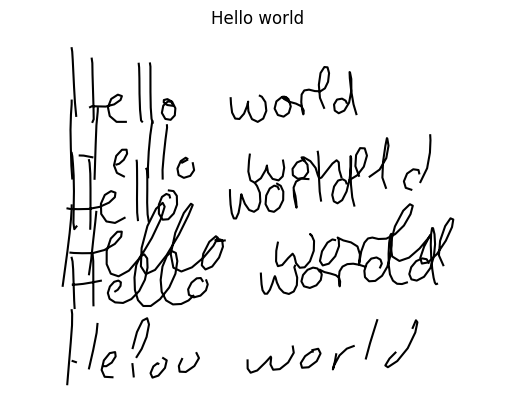

In [5]:
# Create a test string
text_tokens = torch.tensor([ord(x) for x in "Hello world"])
hello_world = torch.zeros(1, 64).to(device=torch.device(device), dtype=torch.long)
hello_world[:, : len(text_tokens)] = text_tokens

with torch.no_grad():
    decoded = conditional_decode_mog(
        model,
        torch.arange(6, device=torch.device(device), dtype=torch.long),
        hello_world.tile((6, 1)),
        T=0.0,
        stop_bias=0.5,
        device=device,
    )

draw_sample(decoded, gaps=True)
plt.show()